In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv(r"E:\15TH SMSTR\Thesis CSE497\thesis work\data set\Train_data.csv")

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
data.shape

(25192, 42)

In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
data.drop(['num_outbound_cmds'],axis=1, inplace= True)

In [7]:
data.shape

(25192, 41)

In [8]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [9]:
data['class'].unique()

array(['normal', 'anomaly'], dtype=object)

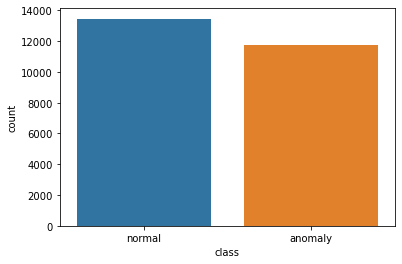

In [10]:
sns.countplot('class',data=data)

In [11]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

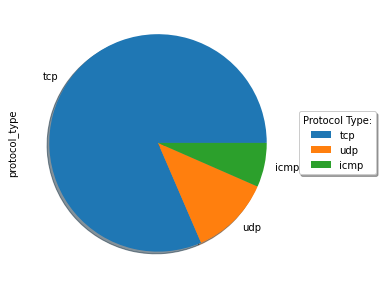

In [12]:
data['protocol_type'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Protocol Type:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

In [13]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [14]:
#data['protocol_type'].unique()
label_encoder = preprocessing.LabelEncoder()
data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])
data['protocol_type'].unique()

array([1, 2, 0])

In [15]:
data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [16]:
#data['service'].unique()
label_encoder = preprocessing.LabelEncoder()
data['service']= label_encoder.fit_transform(data['service'])
data['service'].unique()

array([19, 41, 46, 22, 48, 33, 35, 13, 32, 57, 17, 11, 55, 63,  2, 51,  6,
       62, 34, 61,  3, 10, 18,  4, 29, 14, 20, 64, 56, 23, 15, 65, 25, 26,
       12, 27, 30, 54, 31, 28, 52, 59, 21, 16, 40,  9, 39,  5,  7, 53,  8,
       50, 37, 44, 38,  0, 43, 45, 58, 42, 47, 36, 49,  1, 60, 24])

In [17]:
data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [18]:
label_encoder = preprocessing.LabelEncoder()
data['flag']= label_encoder.fit_transform(data['flag'])
data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [19]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [20]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [21]:
data.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.036421,0.101301,-0.066634,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
protocol_type,0.036421,1.000000,0.025322,0.094926,-0.001286,-0.004734,-0.001123,0.176420,-0.000794,-0.011589,...,0.238318,0.104292,0.004797,0.131609,-0.206137,-0.360518,-0.080432,-0.079086,-0.018424,-0.047182
service,0.101301,0.025322,1.000000,-0.295491,0.008554,-0.013782,-0.006896,0.088169,0.011325,-0.056165,...,0.184684,-0.409442,-0.450546,0.280962,-0.101749,-0.153359,0.276906,0.273472,0.141211,0.142865
flag,-0.066634,0.094926,-0.295491,1.000000,-0.006599,0.027606,-0.006593,0.068693,0.004744,0.067027,...,-0.319355,0.584087,0.634415,-0.284016,0.194528,0.078870,-0.447140,-0.447007,-0.680849,-0.716075
src_bytes,0.084864,-0.001286,0.008554,-0.006599,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,-0.004734,-0.013782,0.027606,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.001123,-0.006896,-0.006593,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,0.176420,0.088169,0.068693,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000794,0.011325,0.004744,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,-0.011589,-0.056165,0.067027,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719


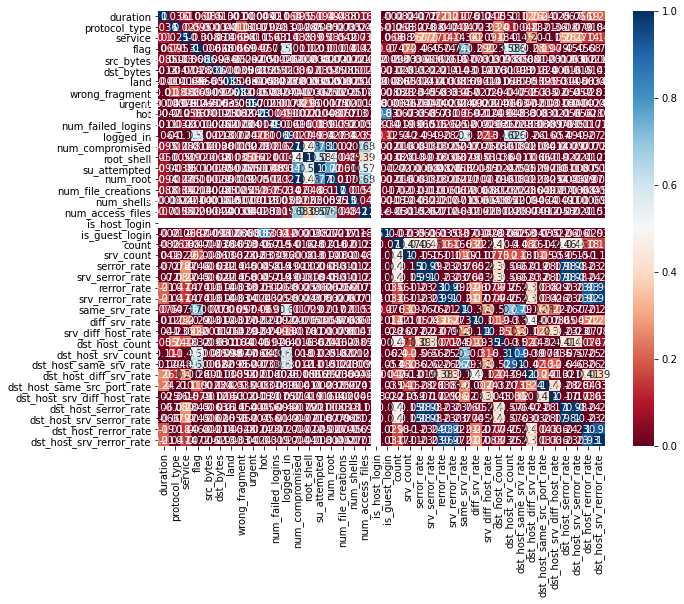

In [22]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(data.corr(), annot=True,cmap="RdBu",vmin=0, vmax=1 )
heat_map

In [23]:
X=data.drop('class',axis=1)
y=data['class']

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.5)

In [25]:
len(data)

25192

In [26]:
len(X_train)

12596

In [27]:
len(y_train)

12596

# Desicion Tree

In [28]:
%%time
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

Wall time: 65.8 ms


In [29]:
#display
y_pred #These are the predicted values. 

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype=object)

In [30]:
nb=DT.score(X_test,y_test)
p=100
m1=nb*p
print("Accuracy: ",m1) # m1 accuracy

Accuracy:  99.4522070498571


In [31]:
DT_error=np.mean(y_pred != y_test) # error rate
DT_error

0.005477929501429025

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      5868
      normal       1.00      0.99      0.99      6728

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



Confusion Matrix:
 [[5842   26]
 [  43 6685]]


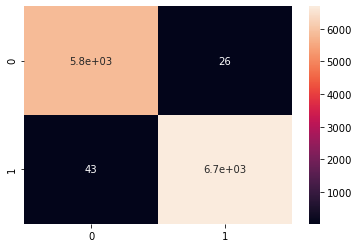

In [33]:
cm_dt= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_dt)
sns.heatmap(cm_dt, annot=True)

# MLP

In [34]:
%%time
mlp = MLPClassifier()
mlp = mlp.fit(X_train, y_train)
y_pred=mlp.predict(X_test)

Wall time: 1.69 s


In [35]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype='<U7')

In [36]:
nb=mlp.score(X_test,y_test)
p=100
m2=nb*p
print("Accuracy: ",m2)

Accuracy:  94.05366783105748


In [37]:
mlp_error=np.mean(y_pred != y_test) # error rate
mlp_error

0.05946332168942521

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.90      0.99      0.94      5868
      normal       0.99      0.90      0.94      6728

    accuracy                           0.94     12596
   macro avg       0.94      0.94      0.94     12596
weighted avg       0.95      0.94      0.94     12596



Confusion Matrix:
 [[5799   69]
 [ 680 6048]]


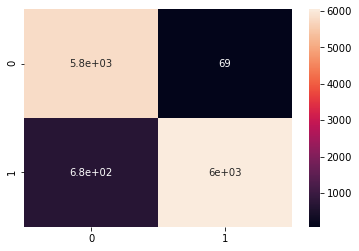

In [39]:
cm_mlp = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_mlp)
sns.heatmap(cm_mlp, annot=True)

# Navie Bayes

In [40]:
%%time
NB=BernoulliNB()
NB= NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

Wall time: 48.9 ms


In [41]:
#Diplay
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype='<U7')

In [42]:
nb=NB.score(X_test,y_test)
p=100
m5=nb*p
print("Accuracy: ",m5)

Accuracy:  89.52842172118133


In [43]:
NB_error=np.mean(y_pred != y_test) # error rate
NB_error

0.10471578278818673

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.92      0.85      0.88      5868
      normal       0.88      0.94      0.91      6728

    accuracy                           0.90     12596
   macro avg       0.90      0.89      0.89     12596
weighted avg       0.90      0.90      0.89     12596



Confusion Matrix:
 [[4968  900]
 [ 419 6309]]


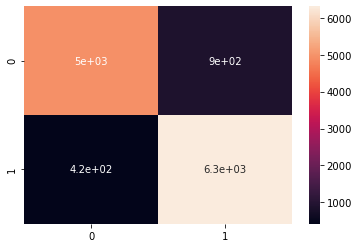

In [45]:
cm_Nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_Nb)
sns.heatmap(cm_Nb, annot=True)

# Nurel Network

In [46]:
%%time
nn = MLPClassifier()
nn = nn.fit(X_train, y_train)
y_pred=nn.predict(X_test)

Wall time: 937 ms


In [47]:
#Diplay
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype='<U7')

In [48]:
nb=nn.score(X_test,y_test)
p=100
m3=nb*p
print("Accuracy: ",m3)

Accuracy:  96.59415687519848


In [49]:
nn_error=np.mean(y_pred != y_test) # error rate
nn_error

0.03405843124801524

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.98      0.94      0.96      5868
      normal       0.95      0.98      0.97      6728

    accuracy                           0.97     12596
   macro avg       0.97      0.96      0.97     12596
weighted avg       0.97      0.97      0.97     12596



Confusion Matrix:
 [[5542  326]
 [ 103 6625]]


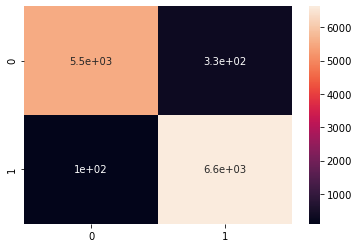

In [51]:
cm_nn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_nn)
sns.heatmap(cm_nn, annot=True)

# Random Forest

In [52]:
%%time
RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

Wall time: 786 ms


In [53]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype=object)

In [54]:
nb=RF.score(X_test,y_test)
p=100
m4=nb*p
print("Accuracy: ",m4)

Accuracy:  99.69831692600826


In [55]:
RF_error=np.mean(y_pred != y_test) # error rate
RF_error

0.003016830739917434

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      5868
      normal       1.00      1.00      1.00      6728

    accuracy                           1.00     12596
   macro avg       1.00      1.00      1.00     12596
weighted avg       1.00      1.00      1.00     12596



Confusion Matrix:
 [[5841   27]
 [  11 6717]]


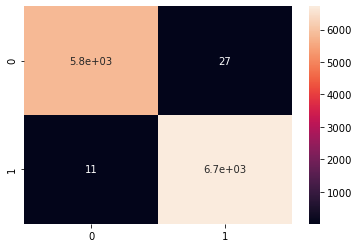

In [57]:
cm_RF = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_RF)
sns.heatmap(cm_RF, annot=True)

# KNeighborsClassifier

In [58]:
%%time
KN = KNeighborsClassifier()
KN = KN.fit(X_train, y_train)
y_pred = KN.predict(X_test)

Wall time: 1.35 s


In [59]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype=object)

In [60]:
nb=KN.score(X_test,y_test)
p=100
m6=nb*p
print("Accuracy: ",m6)

Accuracy:  98.58685296919657


In [61]:
KN_error=np.mean(y_pred != y_test)
KN_error

0.014131470308034296

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.98      0.98      5868
      normal       0.99      0.99      0.99      6728

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



Confusion Matrix:
 [[5771   97]
 [  81 6647]]


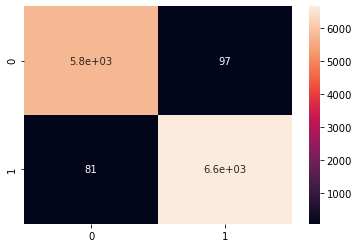

In [63]:
cm_KN = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_KN)
sns.heatmap(cm_KN, annot=True)

# SVM

In [64]:
%%time
SVM= SVC()
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

Wall time: 15.7 s


In [65]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype=object)

In [66]:
nb=SVM.score(X_test,y_test)
p=100
m7=nb*p
print("Accuracy: ",m7)

Accuracy:  66.33852016513178


In [67]:
SVM_error=np.mean(y_pred != y_test)
SVM_error

0.33661479834868213

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.58      0.99      0.73      5868
      normal       0.98      0.38      0.54      6728

    accuracy                           0.66     12596
   macro avg       0.78      0.68      0.64     12596
weighted avg       0.80      0.66      0.63     12596



Confusion Matrix:
 [[5825   43]
 [4197 2531]]


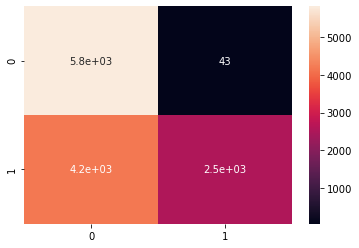

In [69]:
cm_SVM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_SVM)
sns.heatmap(cm_SVM, annot=True)

# LogisticRegression

In [70]:
%%time
LR= LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

Wall time: 112 ms


C:\Users\fuadu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
y_pred

array(['anomaly', 'anomaly', 'anomaly', ..., 'normal', 'anomaly',
       'normal'], dtype=object)

In [72]:
nb=LR.score(X_test,y_test)
p=100
m8=nb*p
print("Accuracy: ",m8)

Accuracy:  87.7421403620197


In [73]:
LR_error=np.mean(y_pred != y_test)
LR_error

0.12257859637980312

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.87      0.86      0.87      5868
      normal       0.88      0.89      0.89      6728

    accuracy                           0.88     12596
   macro avg       0.88      0.88      0.88     12596
weighted avg       0.88      0.88      0.88     12596



Confusion Matrix:
 [[5075  793]
 [ 751 5977]]


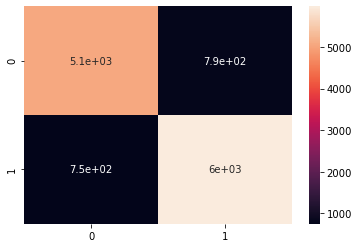

In [75]:
cm_LR = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm_LR)
sns.heatmap(cm_LR, annot=True)

# Comparisom  Part

In [76]:
classifiers = ["DT","MLP","NN","RF","NB","KN","SVM","LR"]
scores = [m1,m2,m3,m4,m5,m6,m7,m8]

In [77]:
Accuracy=pd.DataFrame(scores,classifiers)
Accuracy.columns=['Accuracy']

In [78]:
accu_err_data={
    'Algorithm':["DT","MLP","NN","RF","NB","KN","SVM","LR"],
    'Accuracy':[m1,m2,m3,m4,m5,m6,m7,m8],
    'Error_rate':[DT_error,mlp_error,nn_error,RF_error,NB_error,KN_error,SVM_error,LR_error]
}
df=pd.DataFrame(accu_err_data)

In [79]:
df

,Algorithm,Accuracy,Error_rate
0,DT,99.452207,0.005478
1,MLP,94.053668,0.059463
2,NN,96.594157,0.034058
3,RF,99.698317,0.003017
4,NB,89.528422,0.104716
5,KN,98.586853,0.014131
6,SVM,66.338520,0.336615
7,LR,87.742140,0.122579


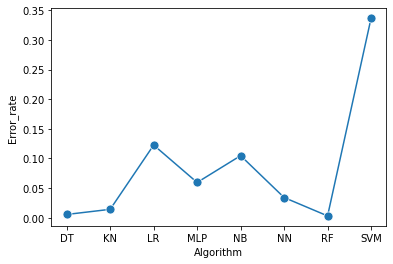

In [80]:
sns.lineplot(data=df, x="Algorithm", y="Error_rate",marker='o', markersize=9)

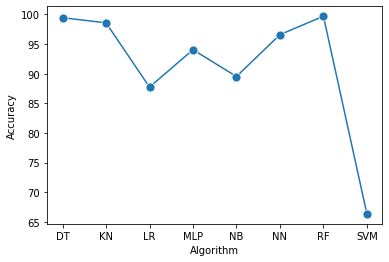

In [81]:
sns.lineplot(data=df, x="Algorithm", y="Accuracy",marker='o', markersize=9)